In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time

# Set up the WebDriver (e.g., Chrome)
driver = webdriver.Chrome()  # Make sure you have the Chrome WebDriver in your PATH

# Open the website
website_url = 'https://www.fragrantica.com/perfume/Dior/Midnight-Poison-1282.html'  # Replace with the target website URL
driver.get(website_url)

# Function to scroll the page by 300 units every 6 seconds
def incremental_scroll():
    last_position = driver.execute_script("return window.pageYOffset;")
    while True:
        # Scroll down by 300 pixels
        driver.execute_script("window.scrollBy(0, 500);")
        time.sleep(2)  # Wait for 6 seconds before scrolling again

        new_position = driver.execute_script("return window.pageYOffset;")
        if new_position == last_position:
            break  # Break if the scroll position hasn't changed (end of page reached)
        last_position = new_position

# Perform incremental scrolling
incremental_scroll()

# Parse the entire page HTML with BeautifulSoup after scrolling is complete
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Close the WebDriver
driver.quit()


<html class="fontawesome-i2svg-active fontawesome-i2svg-complete" data-whatinput="initial" data-whatintent="mouse" lang="en"><head><script async="" src="https://aax-us-east.amazon-adsystem.com/e/dtb/admj?b=JBlX1HQ6KKazG5QyQK-RuIgAAAGSfwrLcQEAAAJYAQBhcHNfdHhuX2JpZDEgICBhcHNfdHhuX2ltcDEgICCz-zyz&amp;rnd=6665301211611728708268819&amp;pp=c0hzwg&amp;p=1xinugw&amp;crid=555223559&amp;ep=%7B%22ce%22%3A%221%22%7D" type="text/javascript"></script><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js" type="text/javascript"></script>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="#dc143c" name="theme-color"/>
<meta content="EN" http-equiv="Content-Language"/>
<meta content="More than twenty years since creation of legendary Poison, Dior is launching the fifth of the Poison range, Midnight Poison. John Galliano\'s inspi..." name="description"/>
<meta con
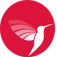

In [8]:
soup

In [9]:
# Now save the BeautifulSoup content to a .txt file
with open('page_content.txt', 'w', encoding='utf-8') as file:
    file.write(soup.prettify())

In [10]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming 'soup' contains the parsed HTML from BeautifulSoup

# Extract the page title
page_title = soup.title.get_text()

# Prepare a list to store extracted review data
data = []

# Find all <div> elements with itemprop="reviewBody"
review_divs = soup.find_all('div', itemprop='reviewBody')

# Loop through all the review divs and store the text content
for div in review_divs:
    review_content = div.get_text(strip=True)  # Extract the review content text
    data.append({'Review': review_content, 'Title': page_title})

# Create a pandas DataFrame from the data list
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Optionally save the DataFrame to a CSV file
df.to_csv('reviews_data.csv', index=False)

# Output a message indicating completion
print("Data has been saved to 'reviews_data.csv'.")


                                                Review  \
0    Dior I beg you please bring this back there is...   
1    GORGEOUS!! One of the best patchouli scents ev...   
2    @Melody Valentine I second this. Bought that p...   
3    After reading hundreds of reviews I decided th...   
4    I’m still in disbelief that Dior refuses to br...   
..                                                 ...   
205  Had a 50mL bottle and enjoyed having it for it...   
206  the word "masculine" has been used 59 times in...   
207  Wow, what an appropriate name! Midnight Poison...   
208  Immediately when I apply this, my first though...   
209  This one is for patchoulilovers for sure. I li...   

                                                 Title  
0    Midnight Poison Dior perfume - a fragrance for...  
1    Midnight Poison Dior perfume - a fragrance for...  
2    Midnight Poison Dior perfume - a fragrance for...  
3    Midnight Poison Dior perfume - a fragrance for...  
4    Midnight Pois